In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/LICENSE
/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/README.md
/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/nifty50_candlestick_data.csv


**Time Series Analysis of Nifty50 Minute Data: Exploring Trends, Seasonality, and Forecasting with ARIMA**

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# Load the Nifty50 minute data
nifty_data = pd.read_csv("/kaggle/input/nifty50-minute-data-09-01-2015-to-27-03-2024/nifty50_candlestick_data.csv")

In [4]:
# Convert 'Date' and 'Time' columns to datetime
nifty_data['DateTime'] = pd.to_datetime(nifty_data['Date'] + ' ' + nifty_data['Time'], format='%d-%m-%Y %H:%M:%S')
nifty_data.set_index('DateTime', inplace=True)

In [5]:
# Remove 'Date' and 'Time' columns
nifty_data.drop(columns=['Date', 'Time'], inplace=True)

In [6]:
# Descriptive statistics
print("Descriptive Statistics:")
print(nifty_data.describe())

Descriptive Statistics:
                Open           High            Low          Close
count  852087.000000  852087.000000  852087.000000  852087.000000
mean    12646.556959   12649.151892   12643.938859   12646.531010
std      4097.825811    4098.490255    4097.149366    4097.834563
min      6846.800000    6860.900000    6826.350000    6848.100000
25%      9112.325000    9114.725000    9110.000000    9112.300000
50%     11210.750000   11213.500000   11207.800000   11210.700000
75%     16696.050000   16700.175000   16692.050000   16695.850000
max     22522.800000   22526.600000   22516.200000   22519.350000


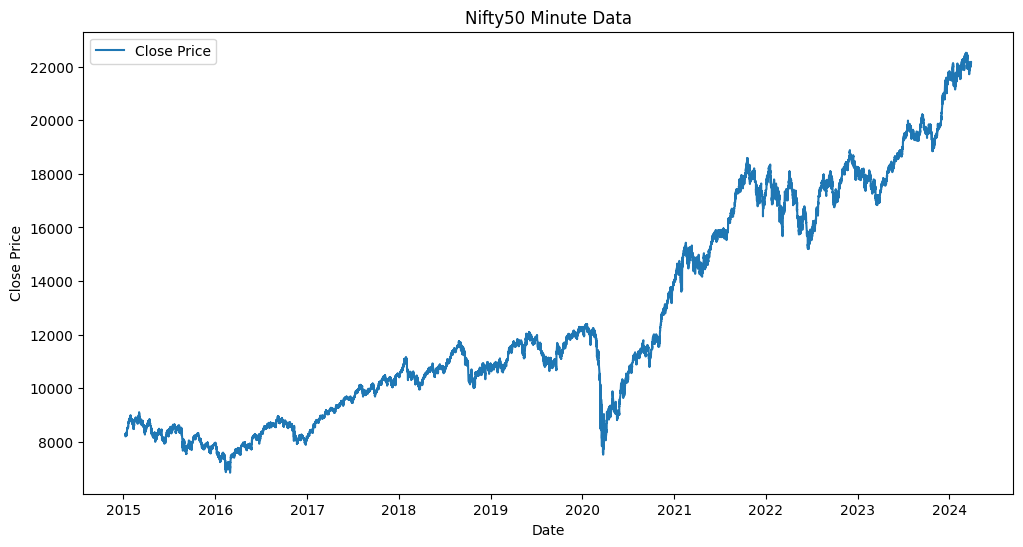

In [7]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Close'], label='Close Price')
plt.title('Nifty50 Minute Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

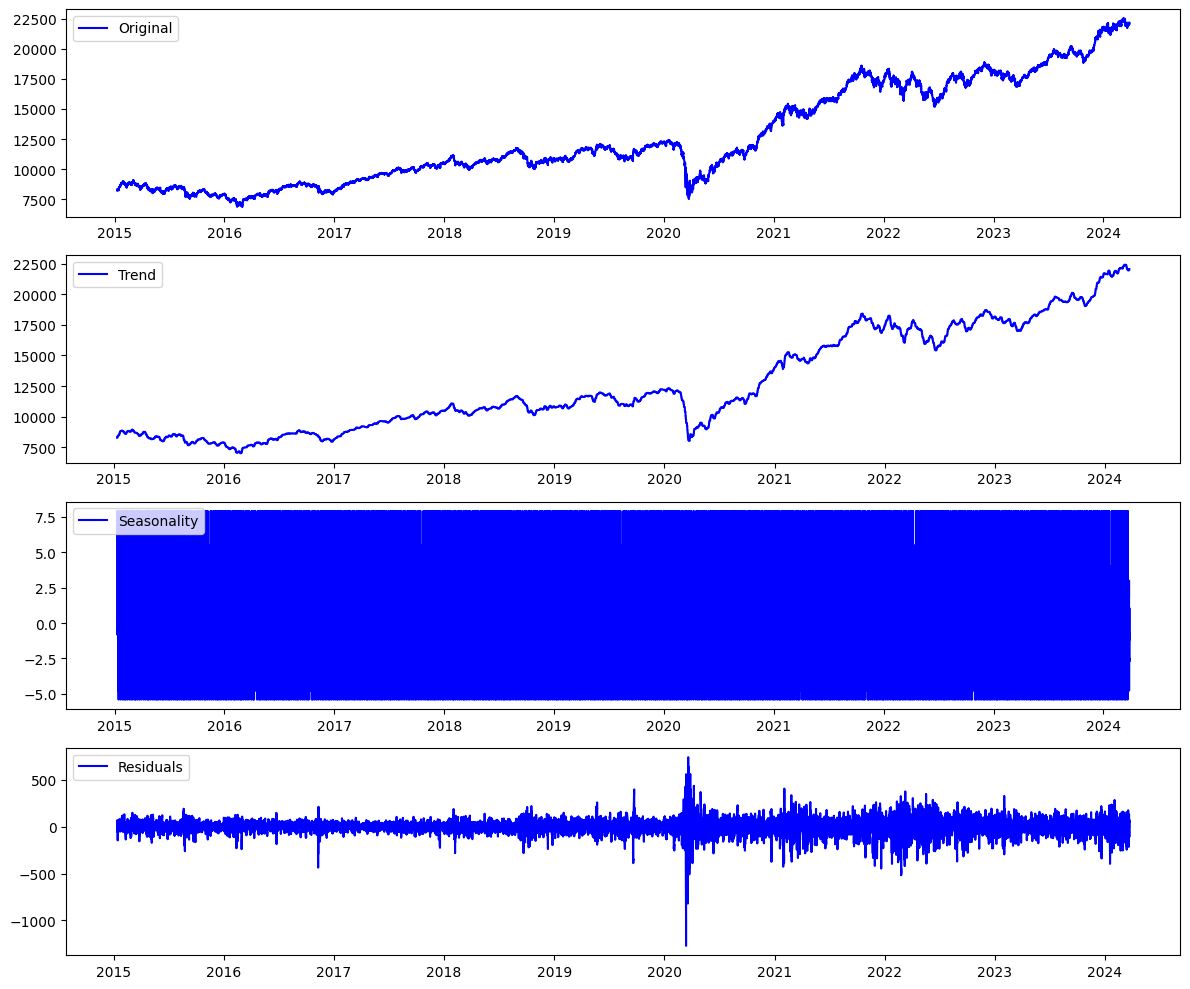

In [8]:
# Decomposition
decomposition = seasonal_decompose(nifty_data['Close'], model='additive', period=24*60)  # Assuming seasonality of 24*60 minutes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(nifty_data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

In [9]:
# Convert 'Close' column to numeric
nifty_data['Close'] = pd.to_numeric(nifty_data['Close'], errors='coerce')

# Remove rows with NaN values in the 'Close' column
nifty_data.dropna(subset=['Close'], inplace=True)

# Downsampling the data to reduce frequency
downsampled_data = nifty_data.resample('1h').agg({'Close': 'mean'})

# Drop rows with missing or infinite values
downsampled_data.dropna(inplace=True)
downsampled_data.replace([np.inf, -np.inf], np.nan, inplace=True)
downsampled_data.dropna(inplace=True)

# Stationarity check (ADF test) on downsampled data
adf_result = adfuller(downsampled_data['Close'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Continue with the rest of your analysis (e.g., visualization, modeling, evaluation, conclusion)


ADF Statistic: 0.6370590849811613
p-value: 0.9884943304699607
Critical Values: {'1%': -3.43076196508153, '5%': -2.861722071482157, '10%': -2.5668669121273453}


<Figure size 1200x600 with 0 Axes>

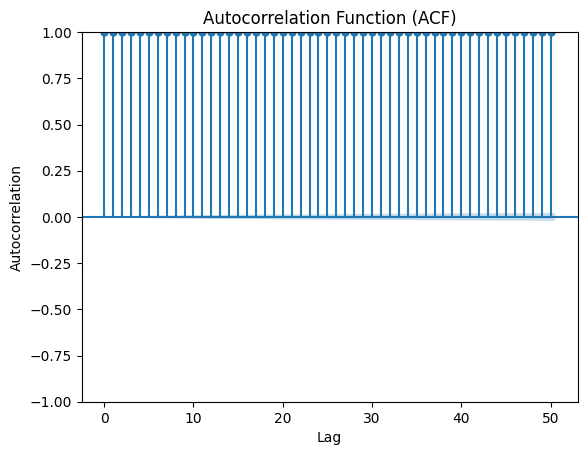

<Figure size 1200x600 with 0 Axes>

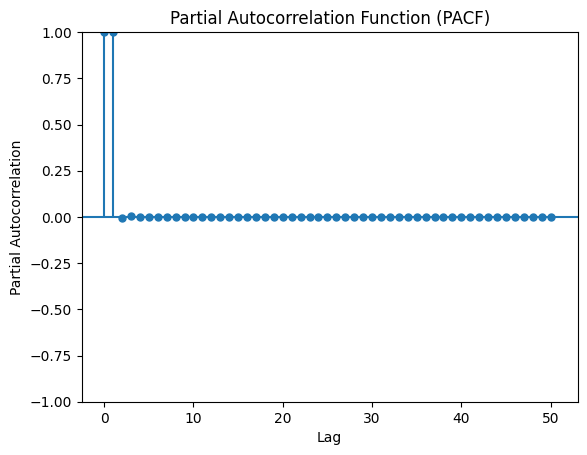

In [10]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(nifty_data['Close'], lags=50, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(nifty_data['Close'], lags=50, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [11]:
# ARIMA modeling
train_size = int(len(downsampled_data) * 0.8)
train, test = downsampled_data.iloc[:train_size], downsampled_data.iloc[train_size:]

In [12]:
# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
# Create a forecast index starting from 0
forecast_index = pd.RangeIndex(start=0, stop=len(test))

# Forecast
forecast = model_fit.forecast(steps=len(test), index=forecast_index)


In [14]:
# Model evaluation
mse = mean_squared_error(test, forecast)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 9891576.60706278


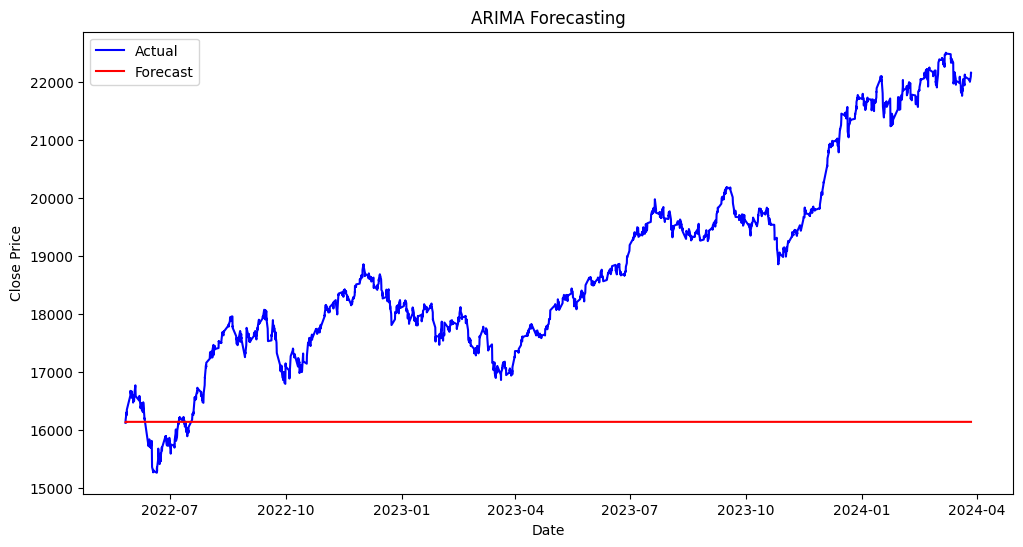

In [15]:
# Visualization of actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()